# Implementação de árvores AVL em Python

## Pré-Requisitos

### Instalação de Bibliotecas

In [29]:
pip install matplotlib networkx


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Importação de Bibliotecas

In [30]:
import matplotlib.pyplot as plt
import networkx as nx

## Algorítmos

In [31]:
"""
TODO @CauaMaia: Ler sobre Árvore AVL, ler o Algorítmo e me apresentar depois. Código tá todo comentadinho, só ler.
TODO @AntonioAzeved0: Ler sobre Árvore AVL, ler o Algorítmo e me apresentar depois. Código tá todo comentadinho, só ler.
"""

class Node:
    """
    Representa um nó em uma árvore AVL
    """
    def __init__(self, key, left=None, right=None, parent=None, height=1):
        self.key = key
        self.left = left
        self.right = right
        self.parent = parent
        self.height = height
        
class AVLTree:
    """
    Representa uma árvore AVL, que é uma árvore binária de busca balanceada.
    """
    def __init__(self):
        """
        Inicializa uma árvore AVL vazia
        """
        self.root = None

    def get_height(self, node):
        """
        Obtém a altura de um nó. Se o nó for None, retorna 0.
        Args:
            node: nó cuja altura será obtida
        Returns:
            A altura do nó
        """
        if not node:
            return 0
        return node.height

    def get_balance(self, node):
        """
        Obtém o fator de balanceamento de um nó. Se o nó for None, retorna 0.
        Args:
            node: nó cujo fator de balanceamento será obtido
        Returns:
            O fator de balanceamento do nó
        """
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    def left_rotate(self, x):
        """
        Realiza uma rotação para a esquerda no nó x.
        Args:
            x: nó que será rotacionado
        Returns:
            O novo nó que está no lugar de x após a rotação
        """
        print(f"Rotação à esquerda no nó {x.key}")
        
        y = x.right
        T2 = y.left

        # Realiza a rotação
        y.left = x
        x.right = T2

        # Atualiza os pais
        if T2:
            T2.parent = x

        y.parent = x.parent
        x.parent = y

        # Atualiza as alturas
        x.height = 1 + max(self.get_height(x.left), self.get_height(x.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        self.visualize()
        return y

    def right_rotate(self, y):
        """
        Realiza uma rotação para a direita no nó y.
        Args:
            y: nó que será rotacionado
        Returns:
            O novo nó que está no lugar de y após a rotação
        """
        print(f"Rotação à direita no nó {y.key}")

        x = y.left
        T2 = x.right

        # Realiza a rotação
        x.right = y
        y.left = T2

        # Atualiza os pais
        if T2:
            T2.parent = y

        x.parent = y.parent
        y.parent = x

        # Atualiza as alturas
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))
        x.height = 1 + max(self.get_height(x.left), self.get_height(x.right))

        self.visualize()
        return x

    def insert(self, key):
        """
        Insere um novo nó com a chave fornecida.
        Args:
            key: chave a ser inserida
        """
        print(f"Inserindo {key}")
        self.root = self._insert(self.root, key)
        self.visualize()

    def _insert(self, node, key):
        """
        Insere um novo nó na árvore.
        Args:
            node: nó atual
            key: chave a ser inserida
        Returns:
            O nó atualizado
        """
        if not node:
            return Node(key)
        elif key < node.key:
            node.left = self._insert(node.left, key)
            node.left.parent = node
        else:
            node.right = self._insert(node.right, key)
            node.right.parent = node

        # Atualiza a altura do nó
        node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))

        # Verificar o fator de balanceamento
        balance = self.get_balance(node)

        # Caso 1: Rotação simples à direita (Esquerda-Esquerda)
        if balance > 1 and key < node.left.key:
            print(f"Rotação simples à direita no nó {node.key} (Esquerda-Esquerda)")
            node = self.right_rotate(node)

        # Caso 2: Rotação simples à esquerda (Direita-Direita)
        elif balance < -1 and key > node.right.key:
            print(f"Rotação simples à esquerda no nó {node.key} (Direita-Direita)")
            node = self.left_rotate(node)

        # Caso 3: Rotação dupla à direita (Esquerda-Direita)
        elif balance > 1 and key > node.left.key:
            print(f"Rotação dupla à direita no nó {node.key} (Esquerda-Direita)")
            node.left = self.left_rotate(node.left)
            self.visualize()
            node = self.right_rotate(node)

        # Caso 4: Rotação dupla à esquerda (Direita-Esquerda)
        elif balance < -1 and key < node.right.key:
            print(f"Rotação dupla à esquerda no nó {node.key} (Direita-Esquerda)")
            node.right = self.right_rotate(node.right)
            self.visualize()
            node = self.left_rotate(node)

        return node

    def delete(self, key):
        """
        Deleta um nó com a chave fornecida.
        Args:
            key: chave a ser deletada
        """
        print(f"Removendo {key}")
        self.root = self._delete(self.root, key)
        self.visualize()

    def _delete(self, node, key):
        """
        Deleta um nó da árvore.
        Args:
            node: nó atual
            key: chave a ser deletada
        Returns:
            O nó atualizado
        """
        if not node:
            print(f"Chave {key} não encontrada na árvore")
            return node

        if key < node.key:
            node.left = self._delete(node.left, key)
            if node.left:
                node.left.parent = node
        elif key > node.key:
            node.right = self._delete(node.right, key)
            if node.right:
                node.right.parent = node
        else:
            print(f"Nó encontrado: {node.key}. Realizando remoção.")
            # Nó com apenas um filho ou sem filhos
            if not node.left:
                temp = node.right
                if temp:
                    temp.parent = node.parent
                node = None
                return temp
            elif not node.right:
                temp = node.left
                if temp:
                    temp.parent = node.parent
                node = None
                return temp

            # Nó tem dois filhos: encontra o sucessor in-order
            temp = self.get_min_value_node(node.right)
            node.key = temp.key
            print(f"Substituindo pelo sucessor in-order: {temp.key}")
            node.right = self._delete(node.right, temp.key)
            if node.right:
                node.right.parent = node

        if not node:
            return node

        # Atualiza a altura do nó
        node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))

        # Verificar o fator de balanceamento
        balance = self.get_balance(node)

        # Caso 1: Rotação simples à direita (Esquerda-Esquerda)
        if balance > 1 and self.get_balance(node.left) >= 0:
            print(f"Rotação simples à direita no nó {node.key} (Esquerda-Esquerda) após remoção")
            node = self.right_rotate(node)

        # Caso 2: Rotação simples à esquerda (Direita-Direita)
        elif balance < -1 and self.get_balance(node.right) <= 0:
            print(f"Rotação simples à esquerda no nó {node.key} (Direita-Direita) após remoção")
            node = self.left_rotate(node)

        # Caso 3: Rotação dupla à direita (Esquerda-Direita)
        elif balance > 1 and self.get_balance(node.left) < 0:
            print(f"Rotação dupla à direita no nó {node.key} (Esquerda-Direita) após remoção")
            node.left = self.left_rotate(node.left)
            self.visualize()
            node = self.right_rotate(node)

        # Caso 4: Rotação dupla à esquerda (Direita-Esquerda)
        elif balance < -1 and self.get_balance(node.right) > 0:
            print(f"Rotação dupla à esquerda no nó {node.key} (Direita-Esquerda) após remoção")
            node.right = self.right_rotate(node.right)
            self.visualize()
            node = self.left_rotate(node)

        return node

    def get_min_value_node(self, node):
        """
        Obtém o nó com a menor chave na subárvore.
        Args:
            node: nó raiz da subárvore
        Returns:
            O nó com a menor chave
        """
        current = node
        while current.left:  # Enquanto houver um filho à esquerda, continue descendo
            current = current.left
        return current

    def search(self, node, key):
        """
        Procura um nó com a chave fornecida.
        Args:
            node: nó raiz da subárvore
            key: chave a ser procurada
        Returns:
            O nó com a chave fornecida, se existir
        """
        if not node or node.key == key:  # Se o nó é None ou a chave foi encontrada
            return node
        elif key < node.key:  # Se a chave é menor que a chave do nó, então a chave está na subárvore esquerda
            return self.search(node.left, key)
        else:  # Se a chave é maior que a chave do nó, então a chave está na subárvore direita
            return self.search(node.right, key)

    def inorder(self):
        """
        Realiza uma travessia in-order na árvore.
        Returns:
            Uma lista com as chaves dos nós na ordem in-order
        """
        res = []
        self._inorder_helper(self.root, res)
        return res

    def _inorder_helper(self, node, res):
        """
        Função auxiliar para realizar uma travessia in-order na árvore de forma recursiva.
        Args:
            node: nó atual
            res: lista que armazenará as chaves dos nós
        """
        if node:
            self._inorder_helper(node.left, res)
            res.append(node.key)
            self._inorder_helper(node.right, res)

    def visualize(self):
        """
        Visualiza a árvore AVL
        """
        G = nx.DiGraph()  # Cria um grafo direcionado
        labels = {}  # Dicionário para armazenar os rótulos dos nós
        self._add_edges(self.root, G, labels)  # Adiciona as arestas ao grafo
        pos = nx.nx_pydot.graphviz_layout(G, prog='dot')  # Obtém a posição dos nós

        nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=500)  # Desenha o grafo

        ax = plt.gca()
        for node in G.nodes():  # Adiciona os rótulos dos nós
            x, y = pos[node]
            node_label = labels[node]
            ax.text(x, y, node_label, ha='center', va='center', color='black', fontsize=10)
        plt.show()

    def _add_edges(self, node, G, labels):
        """
        Funcão auxiliar para adicionar as arestas ao grafo.
        Args:
            node: nó atual
            G: grafo
            labels: dicionário para armazenar os rótulos dos nós
        """
        if node:
            G.add_node(id(node))  # Adiciona o nó ao grafo
            labels[id(node)] = str(node.key)  # Armazena o rótulo do nó

            if node.left:  # Adiciona a aresta para o filho à esquerda
                G.add_edge(id(node), id(node.left))
                self._add_edges(node.left, G, labels)
            if node.right:  # Adiciona a aresta para o filho à direita
                G.add_edge(id(node), id(node.right))
                self._add_edges(node.right, G, labels)

## Testes

Inserindo 20


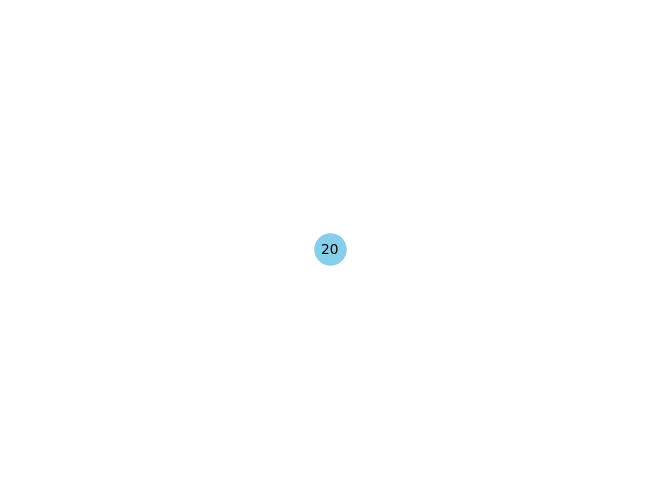

Inserindo 15


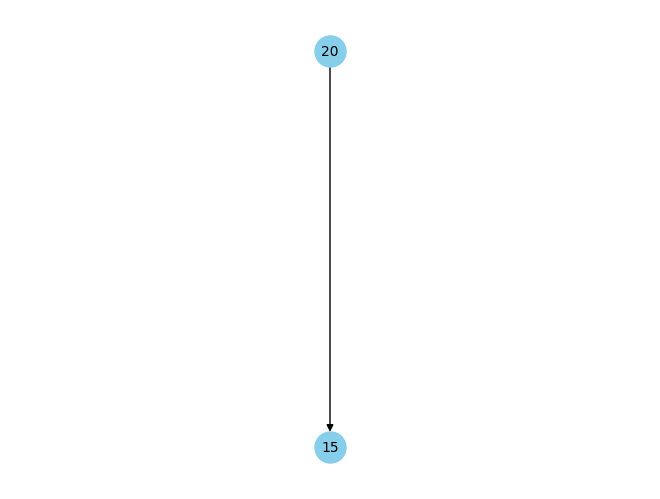

Inserindo 25


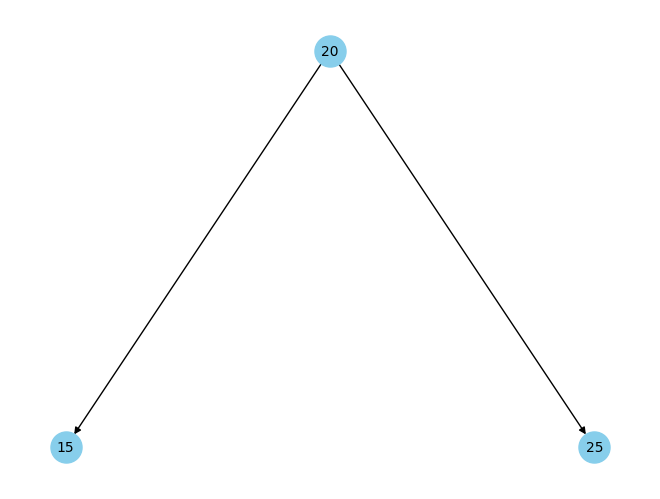

Inserindo 10


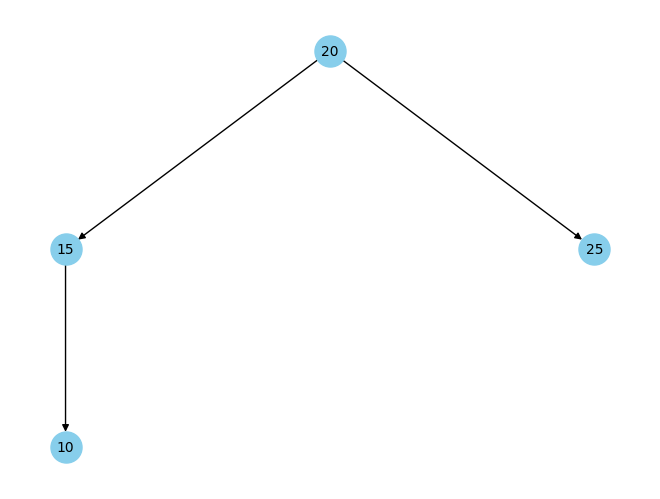

Inserindo 18


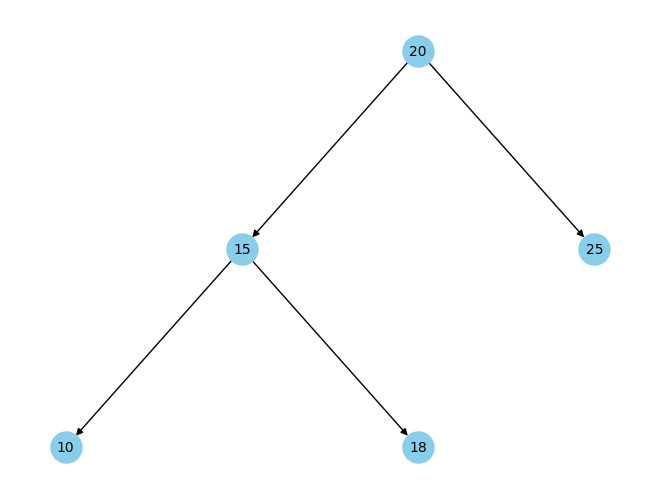

Inserindo 22


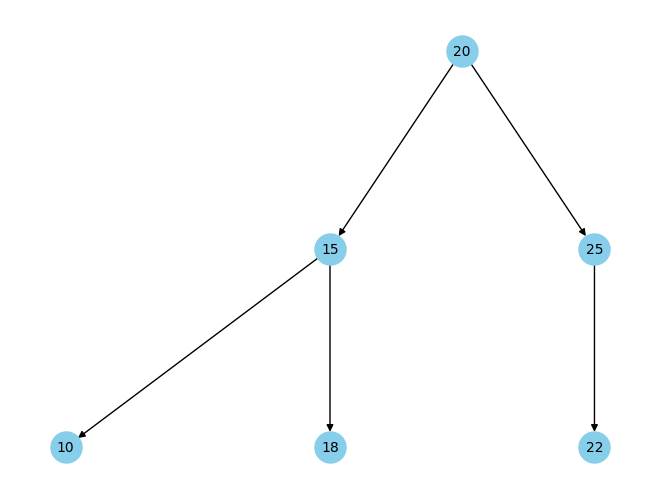

Inserindo 30


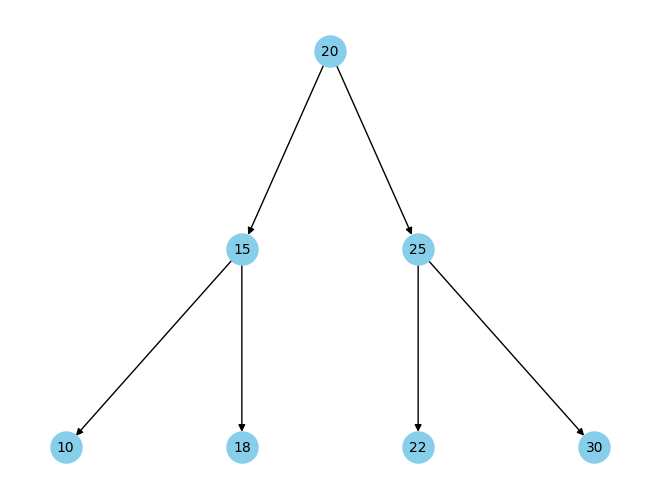

Inserindo 6


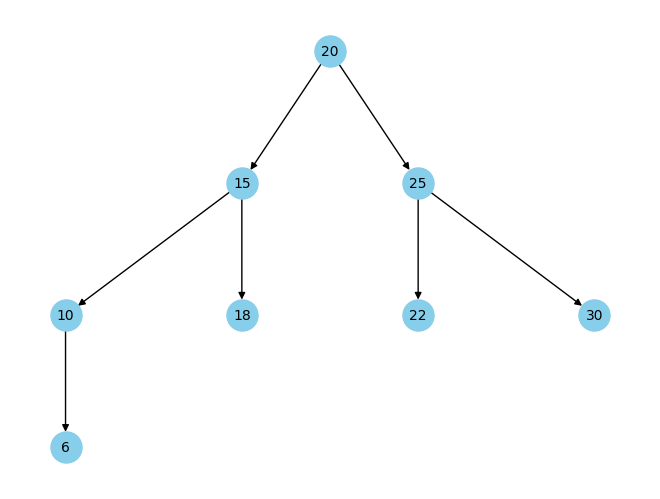

Inserindo 12


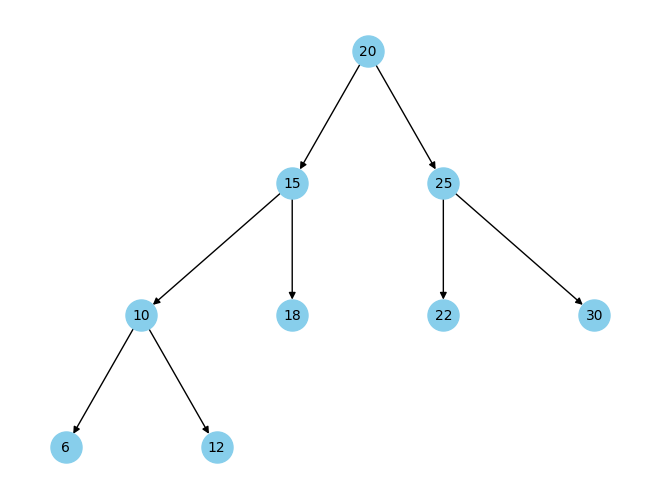

Inserindo 17


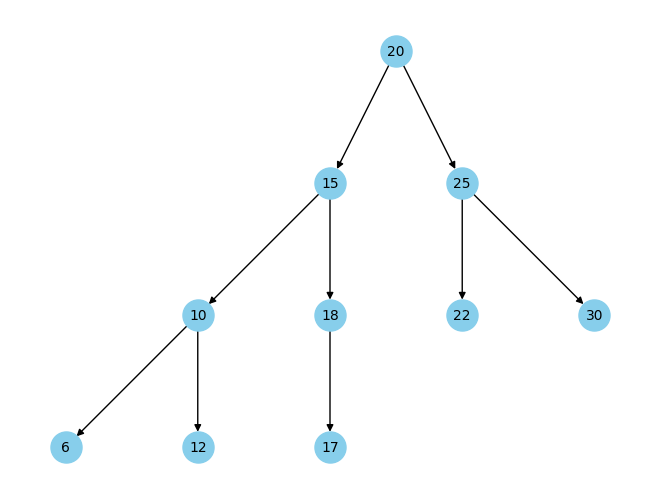

Inserindo 19


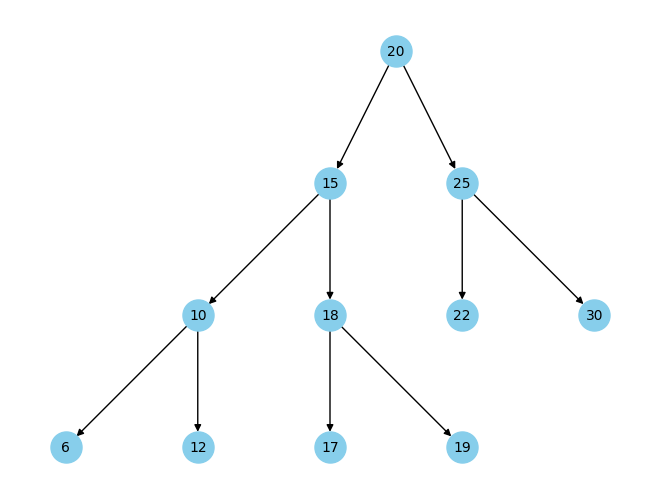

Inserindo 21


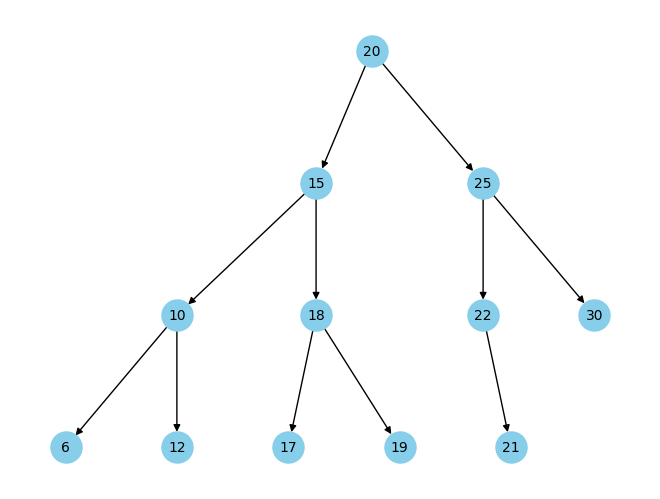

Inserindo 24


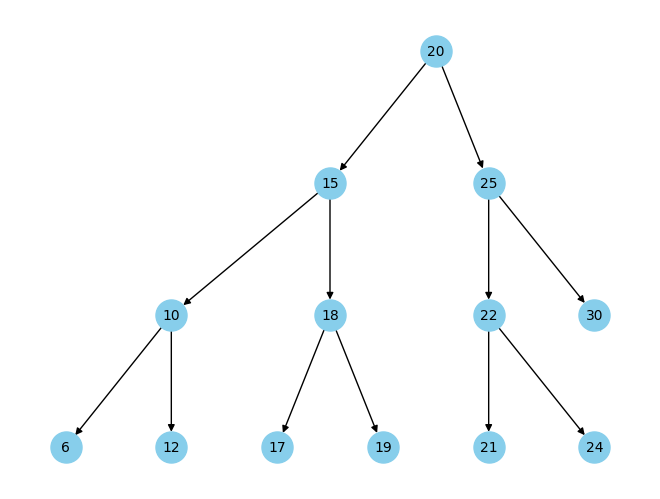

Inserindo 28


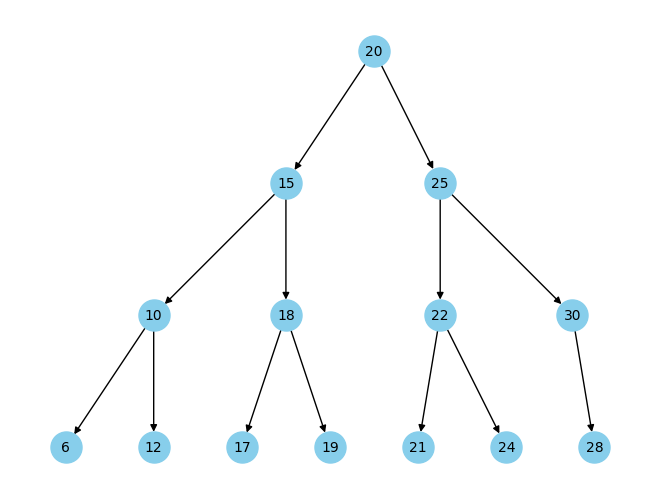

Inserindo 35


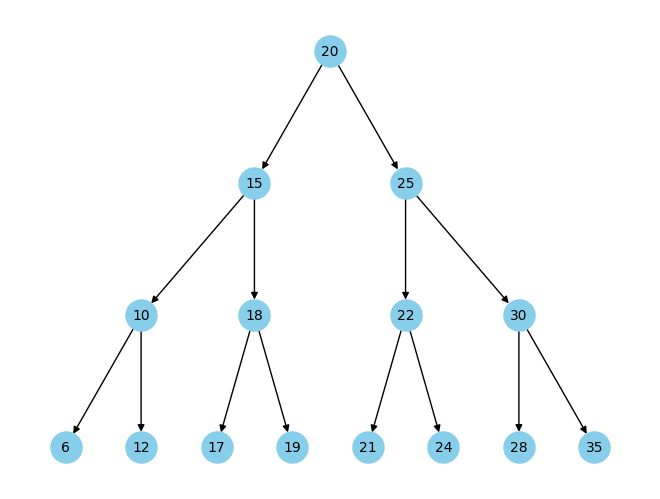

Inserindo 4


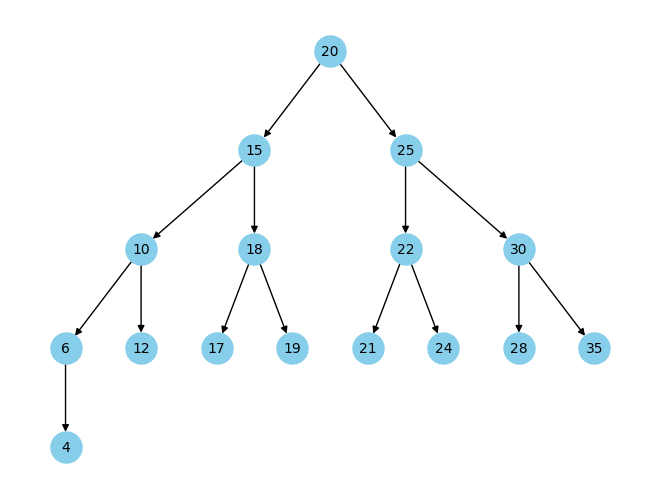

Inserindo 8


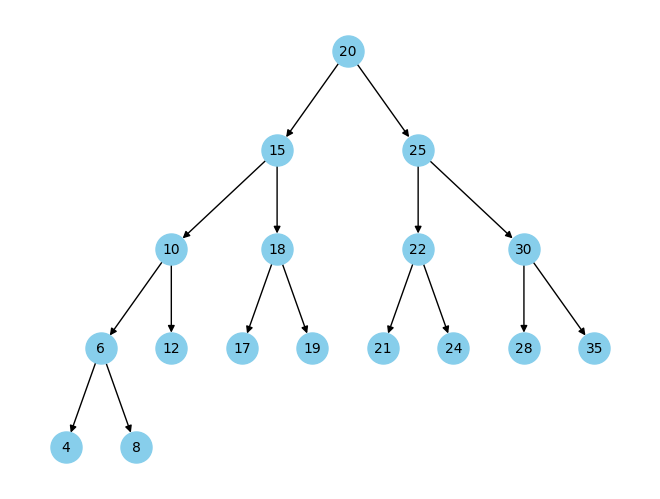

Inserindo 11


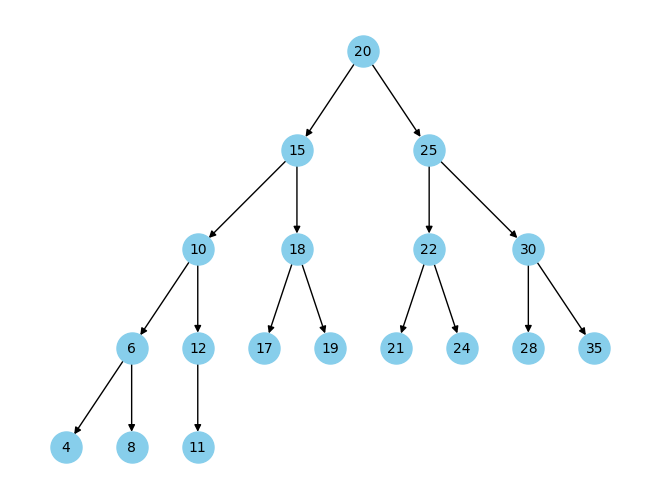

Inserindo 13


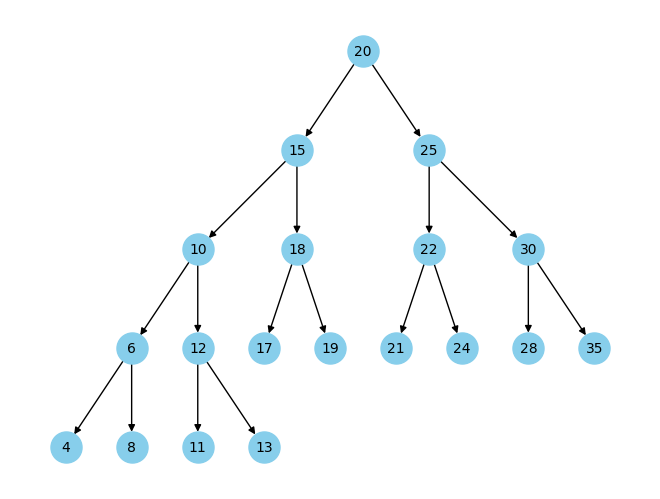

Inserindo 16


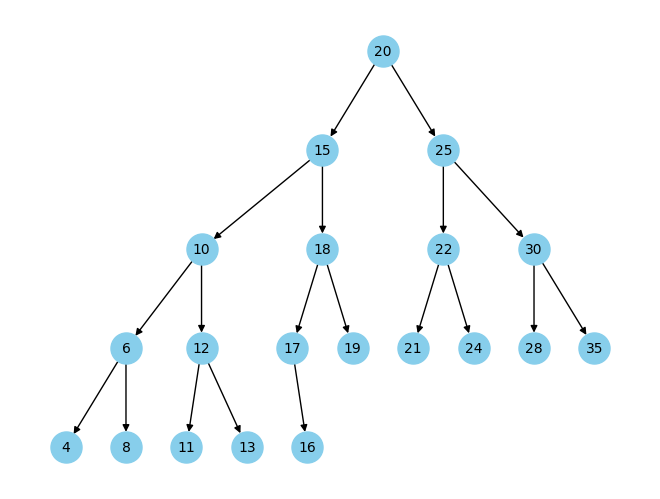

Inserindo 23


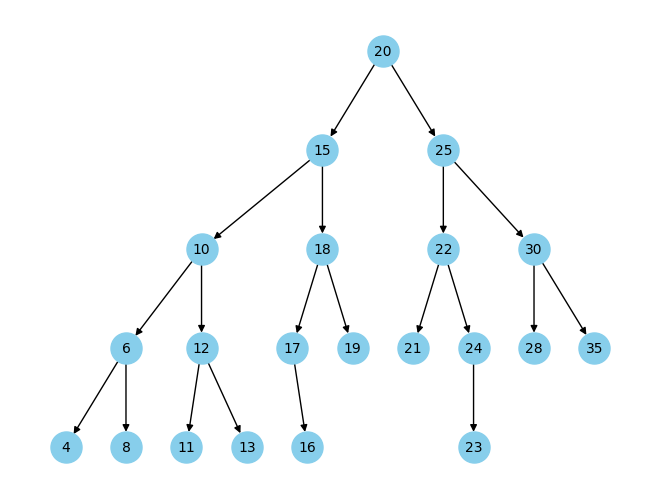

Inserindo 26


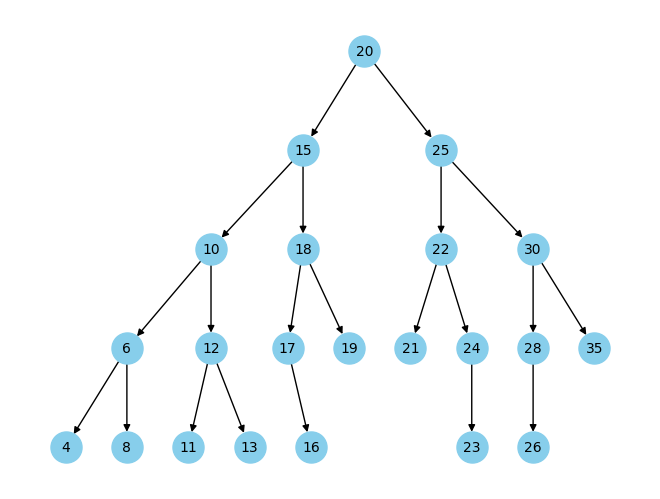

Inserindo 33


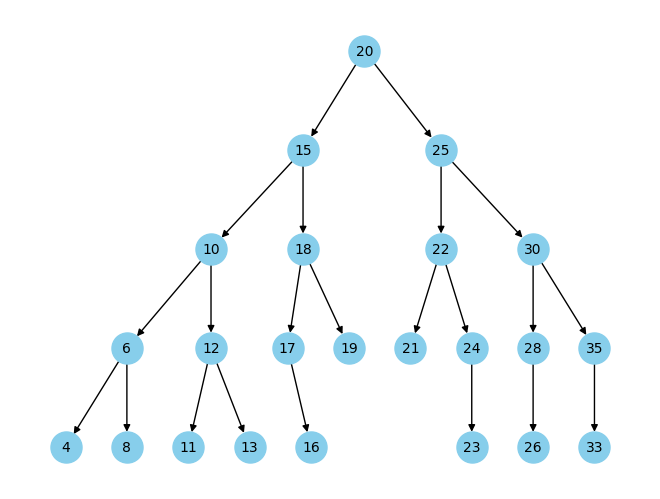

Travessia em ordem:
[4, 6, 8, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 33, 35]


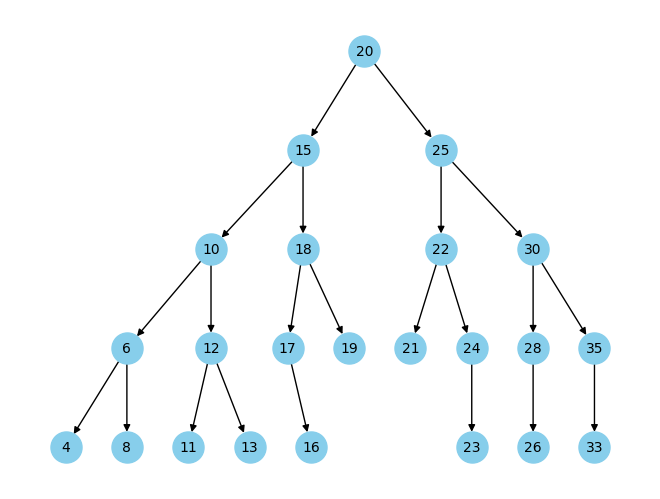

Removendo 15
Nó encontrado: 15. Realizando remoção.
Substituindo pelo sucessor in-order: 16
Nó encontrado: 16. Realizando remoção.


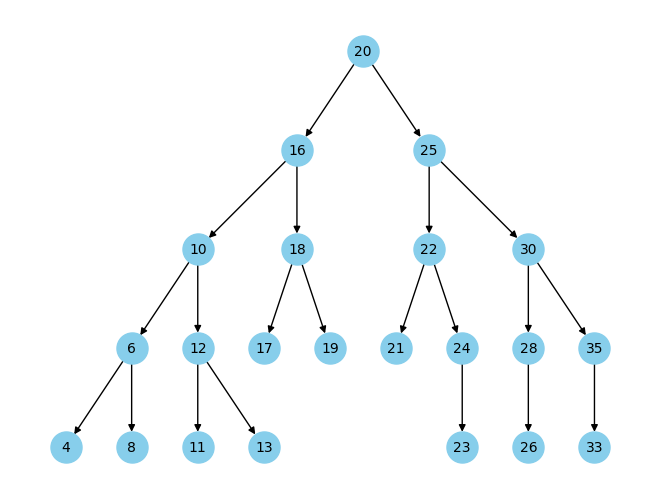

Removendo 25
Nó encontrado: 25. Realizando remoção.
Substituindo pelo sucessor in-order: 26
Nó encontrado: 26. Realizando remoção.


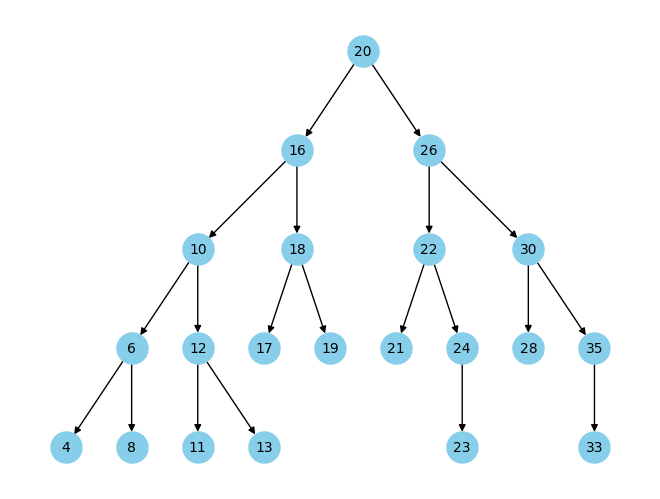

Travessia em ordem após deletar nós:
[4, 6, 8, 10, 11, 12, 13, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 28, 30, 33, 35]


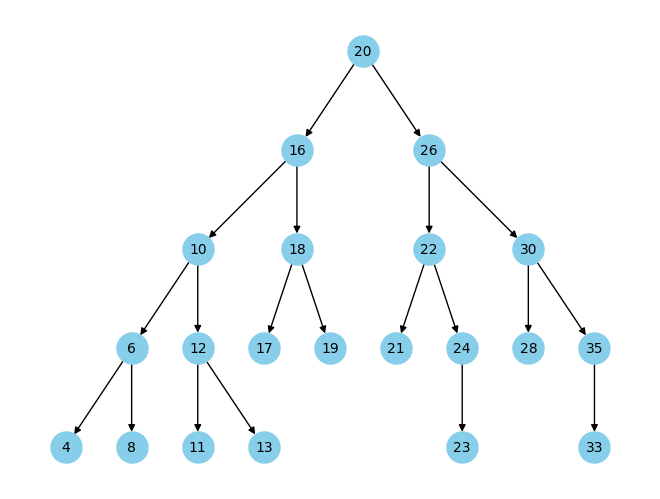

In [32]:
if __name__ == "__main__":
    tree = AVLTree()
    values = [20, 15, 25, 10, 18, 22, 30, 6, 12, 17, 19, 21, 24, 28, 35, 4, 8, 11, 13, 16, 23, 26, 33]
    for val in values:
        tree.insert(val)

    print("Travessia em ordem:")
    print(tree.inorder())

    tree.visualize()

    tree.delete(15)
    tree.delete(25)
    print("Travessia em ordem após deletar nós:")
    print(tree.inorder())

    tree.visualize()